In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from src.logger import init_logger
from src.builtin.estimators import TabNetClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Init Logger

In [2]:
logger_dir = 'logs/demo'
logger_name = 'Classification'
level = 'INFO'

logger = init_logger(logger_dir=logger_dir, logger_name=logger_name, level=level)

## Load Data

In [3]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)
print(y.shape)



(569, 30)
(569,)


## Modeling

In [4]:
tabnet = TabNetClassifier(
    input_dims=30, output_dims=[1], logger=logger, is_cuda=True,
    reprs_dims=8, atten_dims=4, num_steps=3, num_indep=1, num_shared=1
)

### Build Network Architecture

In [5]:
tabnet.build(path=None)

[2021-01-27 21:11:56,724][WARNING][TabNet] Failed to load model from None


TabNetClassifier(atten_dims=4, input_dims=30, is_cuda=True,
                 logger=<RootLogger root (INFO)>, num_shared=1, num_steps=4,
                 output_dims=[1], reprs_dims=4)

### Fit Model

#### Set training params

In [6]:
from torch.optim import Adam
from torch.optim import lr_scheduler


training_params = {
    'batch_size': 512,
    'max_epochs': 200,
    'metrics': ['acc'],
    'optimizer': Adam,
    'optimizer_params': {'lr': 0.1},
    'schedulers': [lr_scheduler.ExponentialLR],
    'scheduler_params': {'gamma': 0.99}
}


In [7]:
tabnet.fit(X, y.reshape(-1, 1), **training_params)

[2021-01-27 21:11:56,758][INFO][TabNet] start training.
[2021-01-27 21:11:56,759][INFO][TabNet] ******************** epoch : 1 ********************
[2021-01-27 21:12:00,008][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:12:00,009][INFO][TabNet] total_loss : 0.882560133934021
[2021-01-27 21:12:00,011][INFO][TabNet] task_loss : 0.8813312649726868
[2021-01-27 21:12:00,011][INFO][TabNet] mask_loss : -1.2288594245910645
[2021-01-27 21:12:00,012][INFO][TabNet] time_cost : 0.9017446041107178
[2021-01-27 21:12:00,012][INFO][TabNet] accuracy : 0.52734375
[2021-01-27 21:12:00,013][INFO][TabNet] ******************** epoch : 2 ********************
[2021-01-27 21:12:02,414][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:12:02,415][INFO][TabNet] total_loss : 0.6697972416877747
[2021-01-27 21:12:02,416][INFO][TabNet] task_loss : 0.6687231659889221
[2021-01-27 21:12:02,416][INFO][TabNet] mask_loss : -1.07405686378479
[2021-01-27 21

[2021-01-27 21:12:36,123][INFO][TabNet] total_loss : 0.1613881140947342
[2021-01-27 21:12:36,123][INFO][TabNet] task_loss : 0.16093569993972778
[2021-01-27 21:12:36,124][INFO][TabNet] mask_loss : -0.45241498947143555
[2021-01-27 21:12:36,125][INFO][TabNet] time_cost : 0.058814287185668945
[2021-01-27 21:12:36,125][INFO][TabNet] accuracy : 0.94140625
[2021-01-27 21:12:36,125][INFO][TabNet] ******************** epoch : 17 ********************
[2021-01-27 21:12:38,535][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:12:38,536][INFO][TabNet] total_loss : 0.208804652094841
[2021-01-27 21:12:38,536][INFO][TabNet] task_loss : 0.20837542414665222
[2021-01-27 21:12:38,537][INFO][TabNet] mask_loss : -0.4292241036891937
[2021-01-27 21:12:38,538][INFO][TabNet] time_cost : 0.05887031555175781
[2021-01-27 21:12:38,539][INFO][TabNet] accuracy : 0.939453125
[2021-01-27 21:12:38,540][INFO][TabNet] ******************** epoch : 18 ********************
[2021-01-27 21:12:4

[2021-01-27 21:13:12,545][INFO][TabNet] time_cost : 0.05882906913757324
[2021-01-27 21:13:12,546][INFO][TabNet] accuracy : 0.94140625
[2021-01-27 21:13:12,546][INFO][TabNet] ******************** epoch : 32 ********************
[2021-01-27 21:13:14,962][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:13:14,963][INFO][TabNet] total_loss : 0.1353140026330948
[2021-01-27 21:13:14,964][INFO][TabNet] task_loss : 0.13499388098716736
[2021-01-27 21:13:14,964][INFO][TabNet] mask_loss : -0.3201228082180023
[2021-01-27 21:13:14,965][INFO][TabNet] time_cost : 0.05982685089111328
[2021-01-27 21:13:14,965][INFO][TabNet] accuracy : 0.95703125
[2021-01-27 21:13:14,966][INFO][TabNet] ******************** epoch : 33 ********************
[2021-01-27 21:13:17,401][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:13:17,402][INFO][TabNet] total_loss : 0.13584744930267334
[2021-01-27 21:13:17,402][INFO][TabNet] task_loss : 0.135535329580307
[

[2021-01-27 21:13:51,341][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:13:51,342][INFO][TabNet] total_loss : 0.1046883687376976
[2021-01-27 21:13:51,343][INFO][TabNet] task_loss : 0.10439632833003998
[2021-01-27 21:13:51,343][INFO][TabNet] mask_loss : -0.29204022884368896
[2021-01-27 21:13:51,344][INFO][TabNet] time_cost : 0.05986166000366211
[2021-01-27 21:13:51,344][INFO][TabNet] accuracy : 0.955078125
[2021-01-27 21:13:51,345][INFO][TabNet] ******************** epoch : 48 ********************
[2021-01-27 21:13:53,752][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:13:53,753][INFO][TabNet] total_loss : 0.148871049284935
[2021-01-27 21:13:53,753][INFO][TabNet] task_loss : 0.1485731452703476
[2021-01-27 21:13:53,754][INFO][TabNet] mask_loss : -0.2979046106338501
[2021-01-27 21:13:53,755][INFO][TabNet] time_cost : 0.05824923515319824
[2021-01-27 21:13:53,755][INFO][TabNet] accuracy : 0.95703125
[2021-01-27 21:13:53,

[2021-01-27 21:14:28,032][INFO][TabNet] task_loss : 0.14186438918113708
[2021-01-27 21:14:28,033][INFO][TabNet] mask_loss : -0.3076024651527405
[2021-01-27 21:14:28,034][INFO][TabNet] time_cost : 0.06907415390014648
[2021-01-27 21:14:28,035][INFO][TabNet] accuracy : 0.955078125
[2021-01-27 21:14:28,035][INFO][TabNet] ******************** epoch : 63 ********************
[2021-01-27 21:14:30,473][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:14:30,474][INFO][TabNet] total_loss : 0.10296858847141266
[2021-01-27 21:14:30,475][INFO][TabNet] task_loss : 0.10265985131263733
[2021-01-27 21:14:30,475][INFO][TabNet] mask_loss : -0.3087396025657654
[2021-01-27 21:14:30,476][INFO][TabNet] time_cost : 0.06000995635986328
[2021-01-27 21:14:30,476][INFO][TabNet] accuracy : 0.96484375
[2021-01-27 21:14:30,477][INFO][TabNet] ******************** epoch : 64 ********************
[2021-01-27 21:14:32,910][INFO][TabNet] -------------------- train info -------------------

[2021-01-27 21:15:04,328][INFO][TabNet] time_cost : 0.060803890228271484
[2021-01-27 21:15:04,328][INFO][TabNet] accuracy : 0.953125
[2021-01-27 21:15:04,329][INFO][TabNet] ******************** epoch : 78 ********************
[2021-01-27 21:15:06,732][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:15:06,733][INFO][TabNet] total_loss : 0.09770677238702774
[2021-01-27 21:15:06,733][INFO][TabNet] task_loss : 0.09740276634693146
[2021-01-27 21:15:06,734][INFO][TabNet] mask_loss : -0.3040030598640442
[2021-01-27 21:15:06,735][INFO][TabNet] time_cost : 0.057837486267089844
[2021-01-27 21:15:06,735][INFO][TabNet] accuracy : 0.9609375
[2021-01-27 21:15:06,736][INFO][TabNet] ******************** epoch : 79 ********************
[2021-01-27 21:15:09,146][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:15:09,147][INFO][TabNet] total_loss : 0.08814959228038788
[2021-01-27 21:15:09,148][INFO][TabNet] task_loss : 0.08783700317144394

[2021-01-27 21:15:40,701][INFO][TabNet] ******************** epoch : 93 ********************
[2021-01-27 21:15:43,172][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:15:43,173][INFO][TabNet] total_loss : 0.06732115894556046
[2021-01-27 21:15:43,173][INFO][TabNet] task_loss : 0.06700576841831207
[2021-01-27 21:15:43,174][INFO][TabNet] mask_loss : -0.3153921663761139
[2021-01-27 21:15:43,175][INFO][TabNet] time_cost : 0.05984854698181152
[2021-01-27 21:15:43,175][INFO][TabNet] accuracy : 0.98046875
[2021-01-27 21:15:43,176][INFO][TabNet] ******************** epoch : 94 ********************
[2021-01-27 21:15:45,610][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:15:45,611][INFO][TabNet] total_loss : 0.07913455367088318
[2021-01-27 21:15:45,612][INFO][TabNet] task_loss : 0.07880479097366333
[2021-01-27 21:15:45,612][INFO][TabNet] mask_loss : -0.3297622501850128
[2021-01-27 21:15:45,614][INFO][TabNet] time_cost : 0.067847

[2021-01-27 21:16:20,012][INFO][TabNet] total_loss : 0.05812869593501091
[2021-01-27 21:16:20,012][INFO][TabNet] task_loss : 0.057810064405202866
[2021-01-27 21:16:20,013][INFO][TabNet] mask_loss : -0.31863144040107727
[2021-01-27 21:16:20,014][INFO][TabNet] time_cost : 0.05986595153808594
[2021-01-27 21:16:20,014][INFO][TabNet] accuracy : 0.974609375
[2021-01-27 21:16:20,015][INFO][TabNet] ******************** epoch : 109 ********************
[2021-01-27 21:16:22,455][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:16:22,456][INFO][TabNet] total_loss : 0.07983171939849854
[2021-01-27 21:16:22,456][INFO][TabNet] task_loss : 0.07951190322637558
[2021-01-27 21:16:22,457][INFO][TabNet] mask_loss : -0.31981441378593445
[2021-01-27 21:16:22,458][INFO][TabNet] time_cost : 0.05995440483093262
[2021-01-27 21:16:22,458][INFO][TabNet] accuracy : 0.96875
[2021-01-27 21:16:22,459][INFO][TabNet] ******************** epoch : 110 ********************
[2021-01-27 21:1

[2021-01-27 21:16:56,554][INFO][TabNet] mask_loss : -0.2813270092010498
[2021-01-27 21:16:56,554][INFO][TabNet] time_cost : 0.05896806716918945
[2021-01-27 21:16:56,555][INFO][TabNet] accuracy : 0.978515625
[2021-01-27 21:16:56,556][INFO][TabNet] ******************** epoch : 124 ********************
[2021-01-27 21:16:58,985][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:16:58,986][INFO][TabNet] total_loss : 0.060035340487957
[2021-01-27 21:16:58,986][INFO][TabNet] task_loss : 0.0597568154335022
[2021-01-27 21:16:58,987][INFO][TabNet] mask_loss : -0.27852439880371094
[2021-01-27 21:16:58,987][INFO][TabNet] time_cost : 0.05785346031188965
[2021-01-27 21:16:58,988][INFO][TabNet] accuracy : 0.974609375
[2021-01-27 21:16:58,988][INFO][TabNet] ******************** epoch : 125 ********************
[2021-01-27 21:17:01,443][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:17:01,444][INFO][TabNet] total_loss : 0.06950507313013

[2021-01-27 21:17:32,986][INFO][TabNet] accuracy : 0.96875
[2021-01-27 21:17:32,987][INFO][TabNet] ******************** epoch : 139 ********************
[2021-01-27 21:17:35,408][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:17:35,409][INFO][TabNet] total_loss : 0.04866529256105423
[2021-01-27 21:17:35,410][INFO][TabNet] task_loss : 0.048396721482276917
[2021-01-27 21:17:35,410][INFO][TabNet] mask_loss : -0.26857131719589233
[2021-01-27 21:17:35,411][INFO][TabNet] time_cost : 0.05784773826599121
[2021-01-27 21:17:35,412][INFO][TabNet] accuracy : 0.984375
[2021-01-27 21:17:35,412][INFO][TabNet] ******************** epoch : 140 ********************
[2021-01-27 21:17:37,832][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:17:37,833][INFO][TabNet] total_loss : 0.07220927625894547
[2021-01-27 21:17:37,833][INFO][TabNet] task_loss : 0.0719471350312233
[2021-01-27 21:17:37,834][INFO][TabNet] mask_loss : -0.2621421217918396


[2021-01-27 21:18:11,711][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:18:11,712][INFO][TabNet] total_loss : 0.04721337556838989
[2021-01-27 21:18:11,713][INFO][TabNet] task_loss : 0.046942662447690964
[2021-01-27 21:18:11,713][INFO][TabNet] mask_loss : -0.27071356773376465
[2021-01-27 21:18:11,714][INFO][TabNet] time_cost : 0.06632399559020996
[2021-01-27 21:18:11,714][INFO][TabNet] accuracy : 0.984375
[2021-01-27 21:18:11,715][INFO][TabNet] ******************** epoch : 155 ********************
[2021-01-27 21:18:14,120][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:18:14,120][INFO][TabNet] total_loss : 0.04893919453024864
[2021-01-27 21:18:14,121][INFO][TabNet] task_loss : 0.04866225644946098
[2021-01-27 21:18:14,122][INFO][TabNet] mask_loss : -0.2769373655319214
[2021-01-27 21:18:14,122][INFO][TabNet] time_cost : 0.06909513473510742
[2021-01-27 21:18:14,123][INFO][TabNet] accuracy : 0.98046875
[2021-01-27 21:18:

[2021-01-27 21:18:48,043][INFO][TabNet] task_loss : 0.07234951853752136
[2021-01-27 21:18:48,044][INFO][TabNet] mask_loss : -0.2661110460758209
[2021-01-27 21:18:48,044][INFO][TabNet] time_cost : 0.05787372589111328
[2021-01-27 21:18:48,045][INFO][TabNet] accuracy : 0.970703125
[2021-01-27 21:18:48,045][INFO][TabNet] ******************** epoch : 170 ********************
[2021-01-27 21:18:50,491][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:18:50,492][INFO][TabNet] total_loss : 0.052481040358543396
[2021-01-27 21:18:50,493][INFO][TabNet] task_loss : 0.052215076982975006
[2021-01-27 21:18:50,493][INFO][TabNet] mask_loss : -0.265963077545166
[2021-01-27 21:18:50,494][INFO][TabNet] time_cost : 0.05843210220336914
[2021-01-27 21:18:50,494][INFO][TabNet] accuracy : 0.98046875
[2021-01-27 21:18:50,495][INFO][TabNet] ******************** epoch : 171 ********************
[2021-01-27 21:18:52,972][INFO][TabNet] -------------------- train info ----------------

[2021-01-27 21:19:24,510][INFO][TabNet] time_cost : 0.05919790267944336
[2021-01-27 21:19:24,511][INFO][TabNet] accuracy : 0.982421875
[2021-01-27 21:19:24,512][INFO][TabNet] ******************** epoch : 185 ********************
[2021-01-27 21:19:26,918][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:19:26,918][INFO][TabNet] total_loss : 0.0531897246837616
[2021-01-27 21:19:26,919][INFO][TabNet] task_loss : 0.05292458087205887
[2021-01-27 21:19:26,919][INFO][TabNet] mask_loss : -0.2651434540748596
[2021-01-27 21:19:26,920][INFO][TabNet] time_cost : 0.058878183364868164
[2021-01-27 21:19:26,920][INFO][TabNet] accuracy : 0.974609375
[2021-01-27 21:19:26,921][INFO][TabNet] ******************** epoch : 186 ********************
[2021-01-27 21:19:29,334][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:19:29,335][INFO][TabNet] total_loss : 0.059629280120134354
[2021-01-27 21:19:29,335][INFO][TabNet] task_loss : 0.05935132503

[2021-01-27 21:20:00,969][INFO][TabNet] ******************** epoch : 200 ********************
[2021-01-27 21:20:03,407][INFO][TabNet] -------------------- train info --------------------
[2021-01-27 21:20:03,408][INFO][TabNet] total_loss : 0.04836833104491234
[2021-01-27 21:20:03,408][INFO][TabNet] task_loss : 0.048087604343891144
[2021-01-27 21:20:03,409][INFO][TabNet] mask_loss : -0.28072693943977356
[2021-01-27 21:20:03,409][INFO][TabNet] time_cost : 0.06132912635803223
[2021-01-27 21:20:03,410][INFO][TabNet] accuracy : 0.97265625
[2021-01-27 21:20:03,410][INFO][TabNet] training complete.
[2021-01-27 21:20:03,411][INFO][TabNet] ******************** Summary Info ********************


In [8]:
importance, masks = tabnet.explain(X)

In [51]:
feature_names = [
    'mean radius',
     'mean texture',
     'mean perimeter',
     'mean area',
     'mean smoothness',
     'mean compactness',
     'mean concavity',
     'mean concave points',
     'mean symmetry',
     'mean fractal dimension',
     'radius error',
     'texture error',
     'perimeter error',
     'area error',
     'smoothness error',
     'compactness error',
     'concavity error',
     'concave points error',
     'symmetry error',
     'fractal dimension error',
     'worst radius',
     'worst texture',
     'worst perimeter',
     'worst area',
     'worst smoothness',
     'worst compactness',
     'worst concavity',
     'worst concave points',
     'worst symmetry',
     'worst fractal dimension'
]
len(feature_names)

30

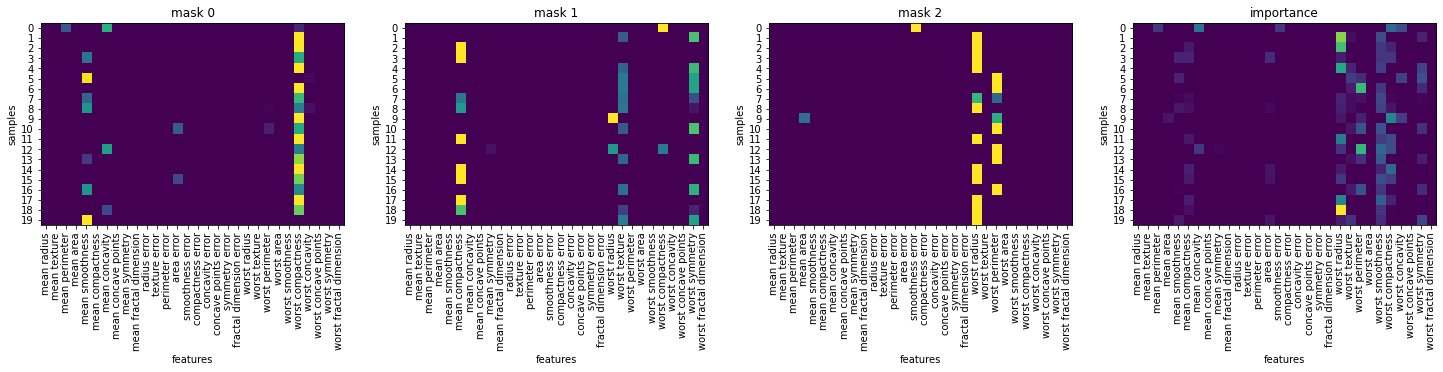

In [73]:
fig, axs = plt.subplots(1, 4, figsize=(25,25))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
    axs[i].set_xticks(range(30))
    axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(30))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()

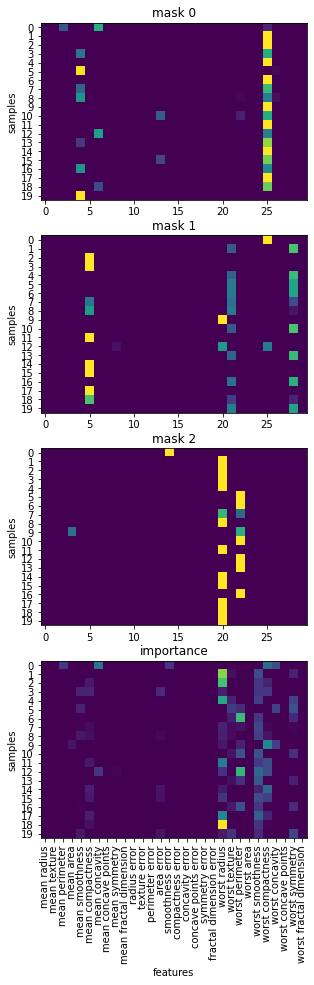

In [85]:
fig, axs = plt.subplots(4, 1, figsize=(5,15))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
#     axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
#     axs[i].set_xticks(range(30))
#     axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(30))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()

In [42]:
data = load_breast_cancer(return_X_y=False)

In [44]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
data.feature_names.tolist()

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']